In [13]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np
from sympl import get_constant

Rd = get_constant('gas_constant_of_dry_air', 'J kg^-1 K^-1')
Cp =\
    get_constant('heat_capacity_of_dry_air_at_constant_pressure',
                 'J kg^-1 K^-1')
g=get_constant('gravitational_acceleration',
                 'm s^-2') 

<IPython.core.display.Javascript object>


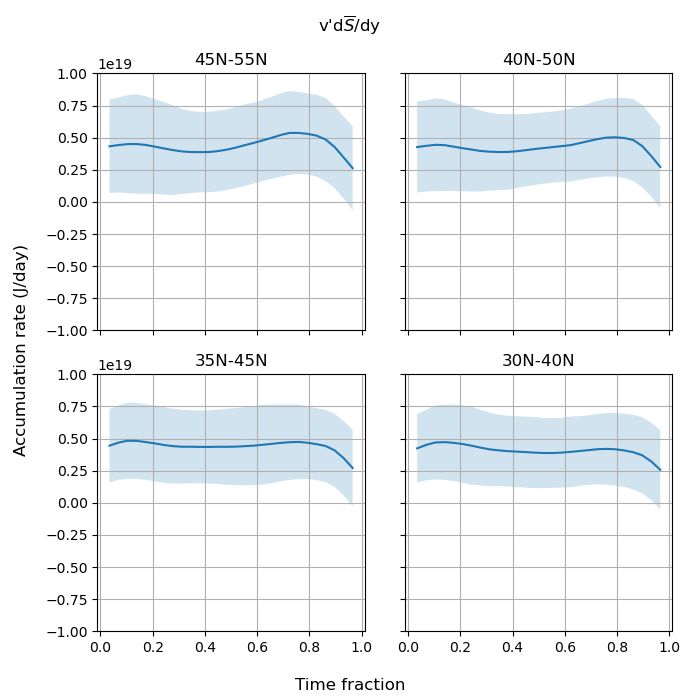

730.0000000000001


In [14]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[0][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[0][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[0][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[0][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (dur_list1[i]>=cut[4]  and dur_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr)
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (dur_list2[i]>=cut[4]  and dur_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr)
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].set_title('40N-50N')

################################################################################################

cut=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (dur_list3[i]>=cut[4]  and dur_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr)
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].set_title('35N-45N')

#################################################################################################

cut=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (dur_list4[i]>=cut[4]  and dur_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr)
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].set_title('30N-40N')

fig.supxlabel('Time fraction')
fig.supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+r'd$\overline{S}$/dy')
plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7a_long.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


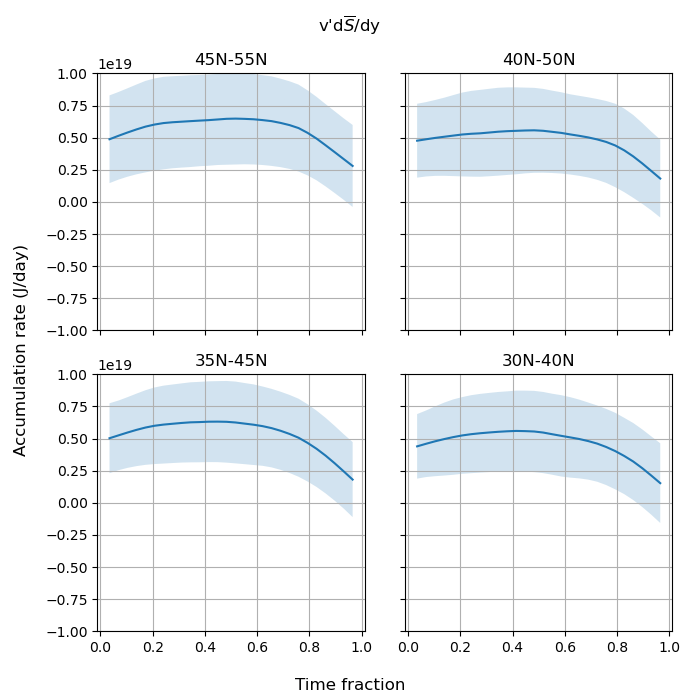

730.0000000000001


In [15]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[0][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[0][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[0][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[0][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (int_list1[i]>=cut[4]  and int_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr)
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (int_list2[i]>=cut[4]  and int_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr)
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].set_title('40N-50N')

################################################################################################

cut=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (int_list3[i]>=cut[4]  and int_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr)
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].set_title('35N-45N')

#################################################################################################

cut=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (int_list4[i]>=cut[4]  and int_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr)
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].set_title('30N-40N')

fig.supxlabel('Time fraction')
fig.supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+r'd$\overline{S}$/dy')
plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7a_intense.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


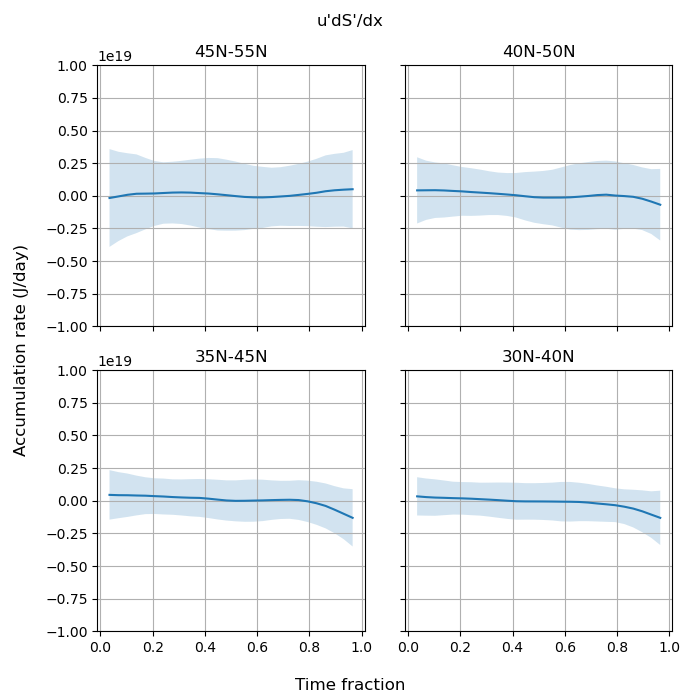

730.0000000000001


In [16]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[1][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[1][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[1][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[1][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (dur_list1[i]>=cut[4]  and dur_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr)
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (dur_list2[i]>=cut[4]  and dur_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr)
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].set_title('40N-50N')

################################################################################################

cut=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (dur_list3[i]>=cut[4]  and dur_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr)
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].set_title('35N-45N')

#################################################################################################

cut=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (dur_list4[i]>=cut[4]  and dur_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr)
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].set_title('30N-40N')

fig.supxlabel('Time fraction')
fig.supylabel('Accumulation rate (J/day)')
fig.suptitle('u'+'\''+'dS\'/dx')
plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7b_long.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


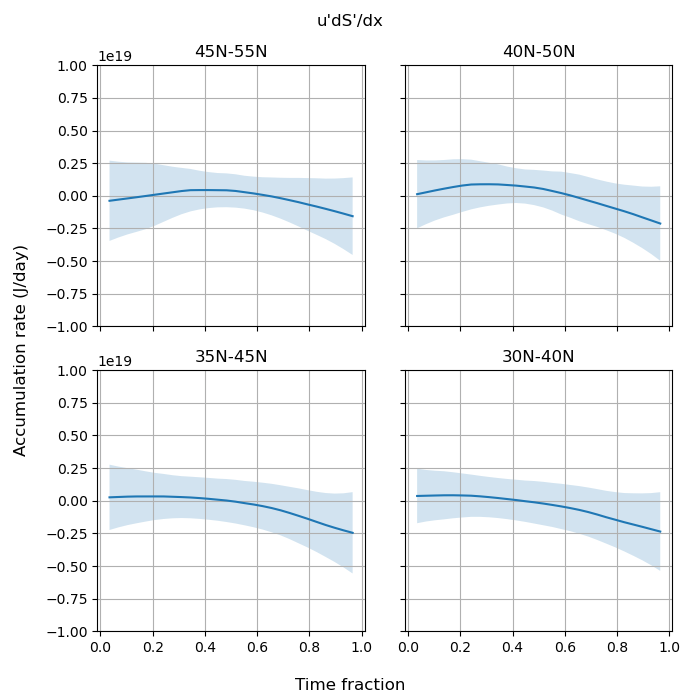

730.0000000000001


In [17]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[1][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[1][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[1][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[1][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (int_list1[i]>=cut[4]  and int_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr)
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (int_list2[i]>=cut[4]  and int_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr)
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].set_title('40N-50N')

################################################################################################

cut=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (int_list3[i]>=cut[4]  and int_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr)
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].set_title('35N-45N')

#################################################################################################

cut=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (int_list4[i]>=cut[4]  and int_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr)
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].set_title('30N-40N')

fig.supxlabel('Time fraction')
fig.supylabel('Accumulation rate (J/day)')
fig.suptitle('u'+'\''+'dS\'/dx')
plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7b_intense.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


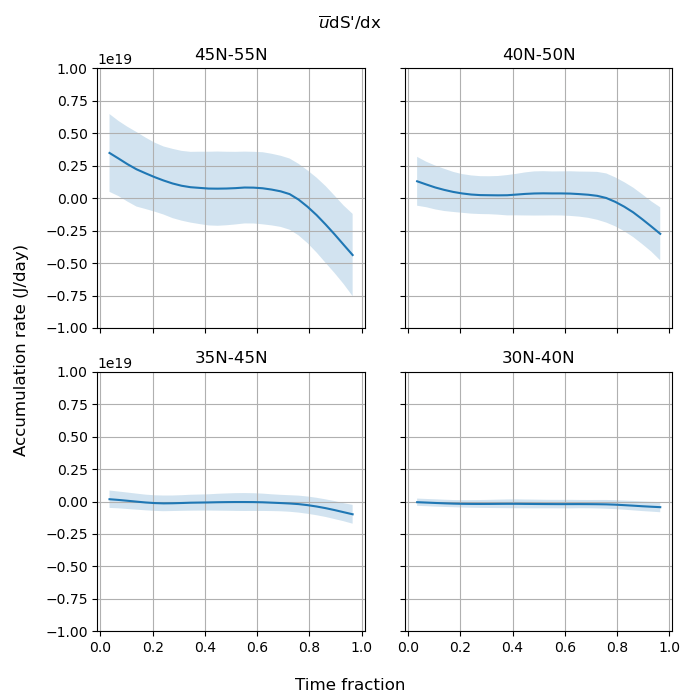

730.0000000000001


In [18]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[2][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[2][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[2][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[2][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (dur_list1[i]>=cut[4]  and dur_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr)
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (dur_list2[i]>=cut[4]  and dur_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr)
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].set_title('40N-50N')

################################################################################################

cut=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (dur_list3[i]>=cut[4]  and dur_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr)
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].set_title('35N-45N')

#################################################################################################

cut=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (dur_list4[i]>=cut[4]  and dur_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr)
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].set_title('30N-40N')

fig.supxlabel('Time fraction')
fig.supylabel('Accumulation rate (J/day)')
# fig.suptitle('uwind_mean.d/dx(DSE_anom)')
fig.suptitle(r'$\overline{u}$'+'dS\'/dx')
plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7c_long.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


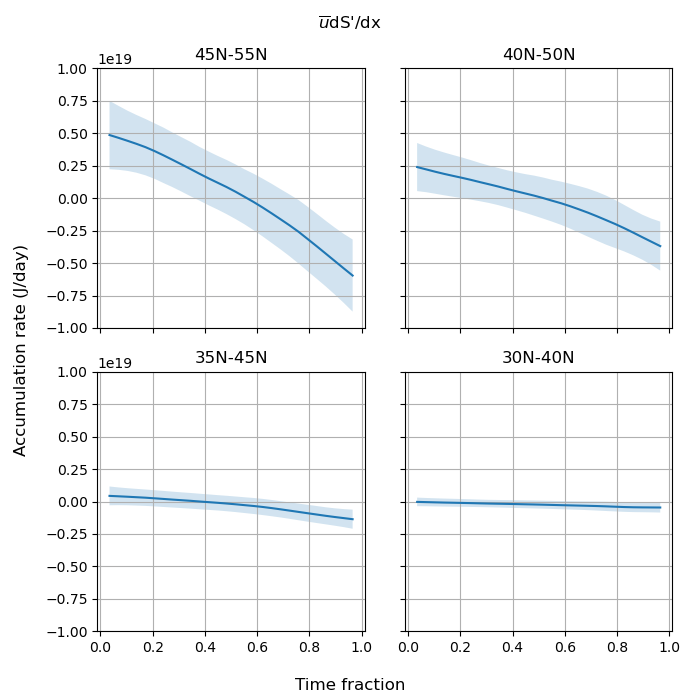

730.0000000000001


In [19]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[2][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[2][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[2][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[2][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (int_list1[i]>=cut[4]  and int_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr)
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (int_list2[i]>=cut[4]  and int_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr)
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].set_title('40N-50N')

################################################################################################

cut=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (int_list3[i]>=cut[4]  and int_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr)
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].set_title('35N-45N')

#################################################################################################

cut=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (int_list4[i]>=cut[4]  and int_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr)
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].set_title('30N-40N')

fig.supxlabel('Time fraction')
fig.supylabel('Accumulation rate (J/day)')
# fig.suptitle('uwind_mean.d/dx(DSE_anom)')
fig.suptitle(r'$\overline{u}$'+'dS\'/dx')
plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7c_intense.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


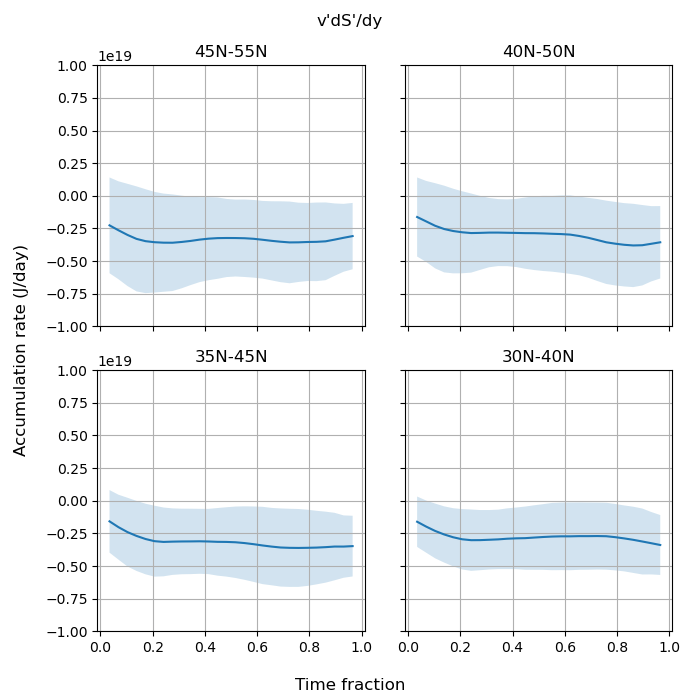

730.0000000000001


In [20]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[3][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[3][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[3][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[3][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (dur_list1[i]>=cut[4]  and dur_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr)
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (dur_list2[i]>=cut[4]  and dur_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr)
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].set_title('40N-50N')

################################################################################################

cut=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (dur_list3[i]>=cut[4]  and dur_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr)
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].set_title('35N-45N')

#################################################################################################

cut=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (dur_list4[i]>=cut[4]  and dur_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr)
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].set_title('30N-40N')

fig.supxlabel('Time fraction')
fig.supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+'dS\'/dy')
plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7d_long.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


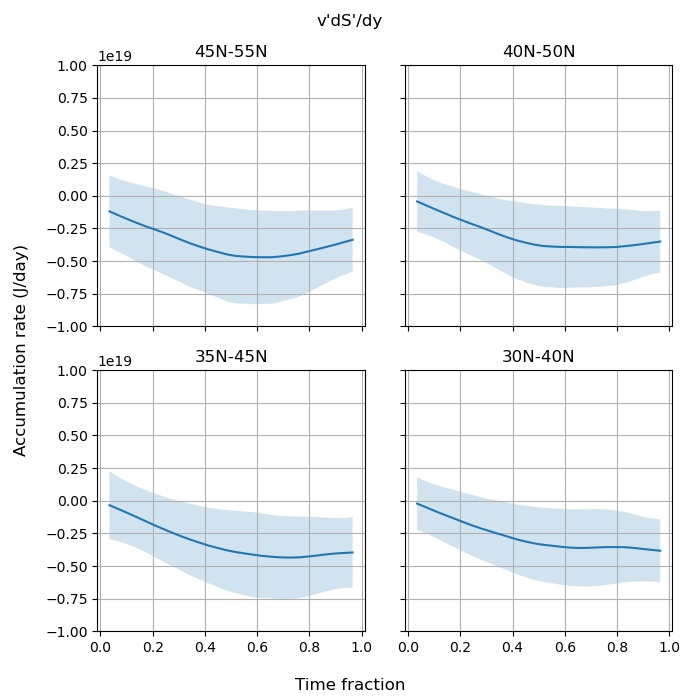

730.0000000000001


In [21]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[3][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[3][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[3][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[3][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (int_list1[i]>=cut[4]  and int_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr)
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (int_list2[i]>=cut[4]  and int_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr)
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].set_title('40N-50N')

################################################################################################

cut=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (int_list3[i]>=cut[4]  and int_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr)
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].set_title('35N-45N')

#################################################################################################

cut=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (int_list4[i]>=cut[4]  and int_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr)
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e19, 1e19])
ax[1][1].set_title('30N-40N')

fig.supxlabel('Time fraction')
fig.supylabel('Accumulation rate (J/day)')
fig.suptitle('v'+'\''+'dS\'/dy')
plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_plots/fig7d_intense.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


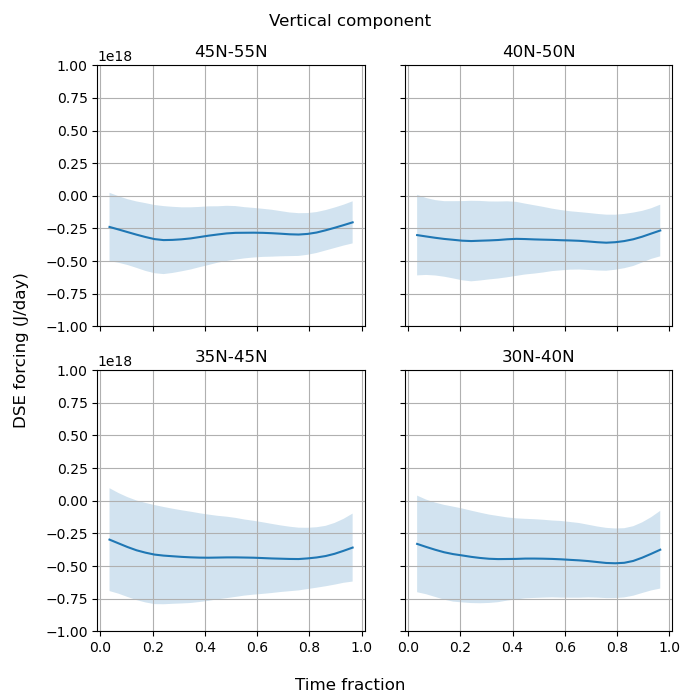

730.0000000000001


In [6]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh1,convfv1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convfh2,convfv2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_datv3', 'rb') as f:
    convfh3,convfv3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh4,convfv4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(convfv1[i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(convfv2[i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(convfv3[i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(convfv4[i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (int_list1[i]>=cut[4]  and int_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr)
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (int_list2[i]>=cut[4]  and int_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr)
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].set_title('40N-50N')

################################################################################################

cut=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (int_list3[i]>=cut[4]  and int_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr)
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].set_title('35N-45N')

#################################################################################################

cut=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (int_list4[i]>=cut[4]  and int_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr)
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e18, 1e18])
ax[1][1].set_title('30N-40N')

fig.supxlabel('Time fraction')
fig.supylabel('DSE forcing (J/day)')
fig.suptitle('Vertical component')
plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_var1/fig7e_intense.png', bbox_inches='tight', dpi=300)

<IPython.core.display.Javascript object>


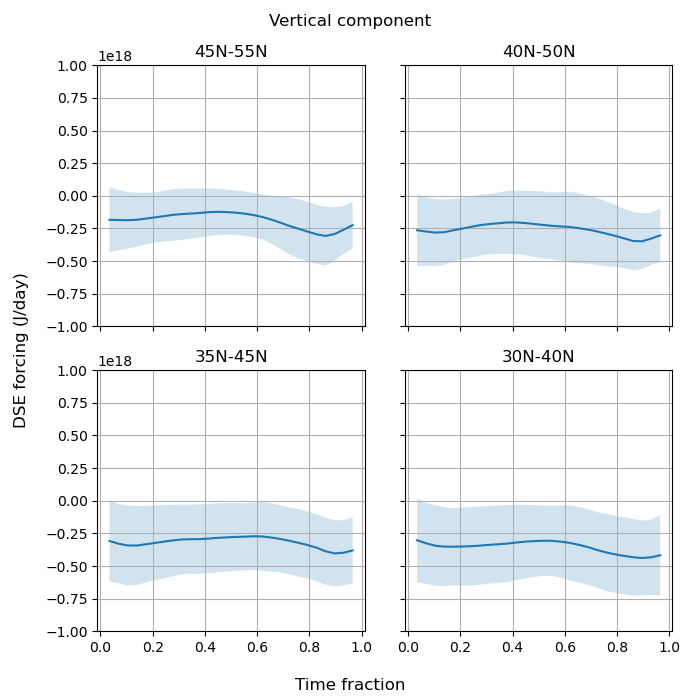

730.0000000000001


In [5]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh1,convfv1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convfh2,convfv2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_datv3', 'rb') as f:
    convfh3,convfv3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh4,convfv4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(convfv1[i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(convfv2[i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(convfv3[i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(convfv4[i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

cut=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac1_list)):
    if (dur_list1[i]>=cut[4]  and dur_list1[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac1_list[i])))
        yy.append(ac1_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr)
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][0].grid()
ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (dur_list2[i]>=cut[4]  and dur_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr)
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[0][1].grid()
ax[0][1].set_title('40N-50N')

################################################################################################

cut=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac3_list)):
    if (dur_list3[i]>=cut[4]  and dur_list3[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac3_list[i])))
        yy.append(ac3_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr)
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][0].grid()
ax[1][0].set_title('35N-45N')

#################################################################################################

cut=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac4_list)):
    if (dur_list4[i]>=cut[4]  and dur_list4[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac4_list[i])))
        yy.append(ac4_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr)
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax[1][1].grid()
ax[1][1].set_ylim([-1e18, 1e18])
ax[1][1].set_title('30N-40N')

fig.supxlabel('Time fraction')
fig.supylabel('DSE forcing (J/day)')
fig.suptitle('Vertical component')
plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_var1/fig7e_long.png', bbox_inches='tight', dpi=300)

<IPython.core.display.Javascript object>


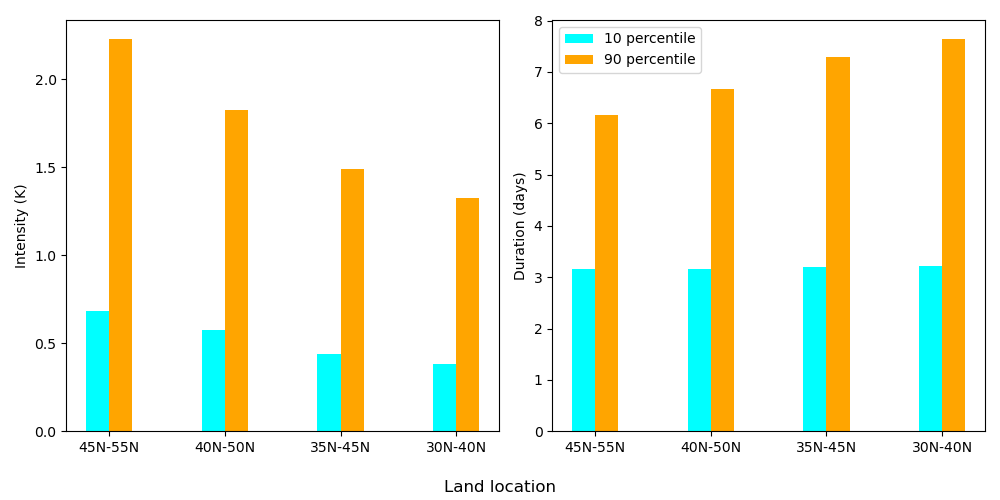

In [63]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_size_inches(10, 5)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]

for i in range(len(heat_index1)):
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])


for i in range(len(heat_index2)):
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])

for i in range(len(heat_index3)):

    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    
for i in range(len(heat_index4)):

    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])


icut1=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])
icut2=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])
icut3=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])
icut4=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

dcut1=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])
dcut2=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])
dcut3=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])
dcut4=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

# species = ()

x = np.arange(4) 
y1 = [icut1[1], icut2[1], icut3[1], icut4[1]] 
y2 = [icut1[4], icut2[4], icut3[4], icut4[4]] 
width = 0.2
  
# plot data in grouped manner of bar type 
ax[0].bar(x-0.1, y1, width, color='cyan') 
ax[0].bar(x+0.1, y2, width, color='orange') 
plt.xticks(x, ['45N-55N', '40N-50N', '35N-45N', '30N-40N']) 
ax[0].set_ylabel("Intensity (K)") 
# ax[0].legend(["10 percentile", "90 percentile"]) 


x = np.arange(4) 
y1 = [dcut1[1], dcut2[1], dcut3[1], dcut4[1]] 
y2 = [dcut1[4], dcut2[4], dcut3[4], dcut4[4]] 
width = 0.2
  
# plot data in grouped manner of bar type 
ax[1].bar(x-0.1, y1, width, color='cyan') 
ax[1].bar(x+0.1, y2, width, color='orange') 
# plt.xticks(x, ['45-55', '40-50', '35-45', '30-40']) 
# ax[1].set_xlabel("Land location") 
ax[1].set_ylabel("Duration (days)") 
ax[1].legend(["10 percentile", "90 percentile"]) 

fig.supxlabel("Land location")

plt.tight_layout() 

plt.savefig('/home/data/lab_abel/Paper1_var1/barplot.png', bbox_inches='tight', dpi=300)

<IPython.core.display.Javascript object>


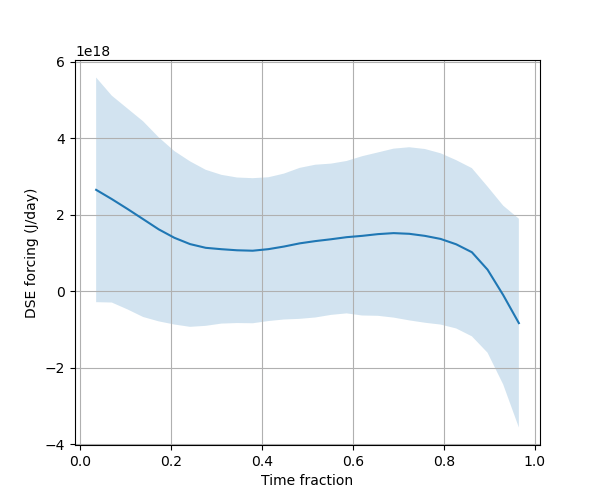

730.0000000000001


In [8]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_size_inches(6, 5)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[0][i][:,:7].sum(axis=1)+Rey1[3][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[0][i][:,:7].sum(axis=1)+Rey2[3][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[0][i][:,:7].sum(axis=1)+Rey3[3][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[0][i][:,:7].sum(axis=1)+Rey4[3][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

# cut=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])

# xx=[]
# yy=[]
# yy1=[]
# for i in range(len(ac1_list)):
#     if (dur_list1[i]>=cut[4]  and dur_list1[i]<=cut[5]):
#         xx.append(np.linspace(0,1,len(ac1_list[i])))
#         yy.append(ac1_list[i])

# xx_arr=np.linspace(0,1,30)
# val_arr=[]
# mean_arr=[];std_arr=[];x_arr=[]

# for e in xx_arr:
#     for i in range(len(xx)):
#         if len(xx[i])>1:
#             f = interpolate.interp1d(xx[i], yy[i])
#             if e>xx[i][0] and xx[i][-1]>e:
#                 val_arr.append(f(e))

#     if len(val_arr)>0:
#         x_arr.append(e)
#         mean_arr.append(np.mean(val_arr))
#         std_arr.append(np.std(val_arr))
#     val_arr=[]

# x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
# ax[0][0].plot(x_arr,mean_arr)
# ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
# ax[0][0].grid()
# ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (dur_list2[i]>=cut[4]  and dur_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax.plot(x_arr,mean_arr)
ax.fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax.grid()
# ax.set_title('40N-50N')

################################################################################################

# cut=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])

# xx=[]
# yy=[]
# yy1=[]
# for i in range(len(ac3_list)):
#     if (dur_list3[i]>=cut[4]  and dur_list3[i]<=cut[5]):
#         xx.append(np.linspace(0,1,len(ac3_list[i])))
#         yy.append(ac3_list[i])

# xx_arr=np.linspace(0,1,30)
# val_arr=[]
# mean_arr=[];std_arr=[];x_arr=[]

# for e in xx_arr:
#     for i in range(len(xx)):
#         if len(xx[i])>1:
#             f = interpolate.interp1d(xx[i], yy[i])
#             if e>xx[i][0] and xx[i][-1]>e:
#                 val_arr.append(f(e))

#     if len(val_arr)>0:
#         x_arr.append(e)
#         mean_arr.append(np.mean(val_arr))
#         std_arr.append(np.std(val_arr))
#     val_arr=[]

# x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
# ax[1][0].plot(x_arr,mean_arr)
# ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
# ax[1][0].grid()
# ax[1][0].set_title('35N-45N')

# #################################################################################################

# cut=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

# xx=[]
# yy=[]
# yy1=[]
# for i in range(len(ac4_list)):
#     if (dur_list4[i]>=cut[4]  and dur_list4[i]<=cut[5]):
#         xx.append(np.linspace(0,1,len(ac4_list[i])))
#         yy.append(ac4_list[i])

# xx_arr=np.linspace(0,1,30)
# val_arr=[]
# mean_arr=[];std_arr=[];x_arr=[]

# for e in xx_arr:
#     for i in range(len(xx)):
#         if len(xx[i])>1:
#             f = interpolate.interp1d(xx[i], yy[i])
#             if e>xx[i][0] and xx[i][-1]>e:
#                 val_arr.append(f(e))

#     if len(val_arr)>0:
#         x_arr.append(e)
#         mean_arr.append(np.mean(val_arr))
#         std_arr.append(np.std(val_arr))
#     val_arr=[]

# x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
# ax[1][1].plot(x_arr,mean_arr)
# ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
# ax[1][1].grid()
# # ax[1][1].set_ylim([-1e19, 1e19])
# ax[1][1].set_title('30N-40N')

plt.xlabel('Time fraction')
plt.ylabel('DSE forcing (J/day)')
# fig.suptitle('vwind_anom.d/dy(DSE_clim)')
# plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_var1/fig7v_long.png', bbox_inches='tight', dpi=300)

<IPython.core.display.Javascript object>


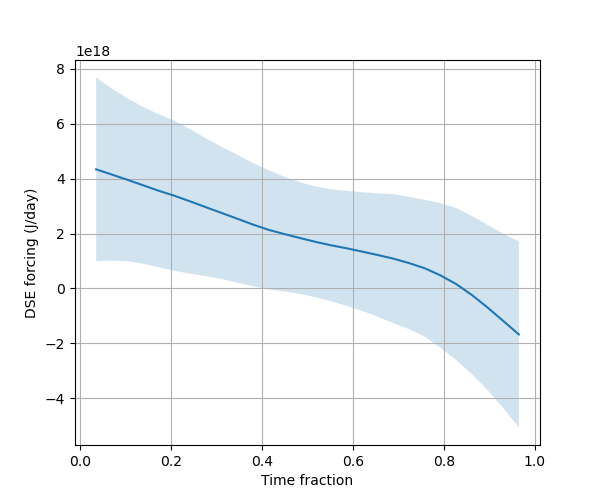

730.0000000000001


In [9]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_size_inches(6, 5)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey1=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey2=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv3', 'rb') as f:
    Rey3=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey4=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[12])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]
ac1_list=[]
ac2_list=[]
ac3_list=[]
ac4_list=[]


for i in range(len(Rey1[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])
    ac1=(Rey1[0][i][:,:7].sum(axis=1)+Rey1[3][i][:,:7].sum(axis=1))
    ac1_list.append(ac1)


for i in range(len(Rey2[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])
    ac2=(Rey2[0][i][:,:7].sum(axis=1)+Rey2[3][i][:,:7].sum(axis=1))
    ac2_list.append(ac2)

for i in range(len(Rey3[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    ac3=(Rey3[0][i][:,:7].sum(axis=1)+Rey3[3][i][:,:7].sum(axis=1))
    ac3_list.append(ac3)
    
for i in range(len(Rey4[0])):

    ## 0-DSEymean.windyanom 1-DSExamon.windxanom 2-DSExanom.windxmean v-DSEyanom.windyanom
    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])
    ac4=(Rey4[0][i][:,:7].sum(axis=1)+Rey4[3][i][:,:7].sum(axis=1))
    ac4_list.append(ac4)

# cut=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])

# xx=[]
# yy=[]
# yy1=[]
# for i in range(len(ac1_list)):
#     if (int_list1[i]>=cut[4]  and int_list1[i]<=cut[5]):
#         xx.append(np.linspace(0,1,len(ac1_list[i])))
#         yy.append(ac1_list[i])

# xx_arr=np.linspace(0,1,30)
# val_arr=[]
# mean_arr=[];std_arr=[];x_arr=[]

# for e in xx_arr:
#     for i in range(len(xx)):
#         if len(xx[i])>1:
#             f = interpolate.interp1d(xx[i], yy[i])
#             if e>xx[i][0] and xx[i][-1]>e:
#                 val_arr.append(f(e))

#     if len(val_arr)>0:
#         x_arr.append(e)
#         mean_arr.append(np.mean(val_arr))
#         std_arr.append(np.std(val_arr))
#     val_arr=[]

# x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
# ax[0][0].plot(x_arr,mean_arr)
# ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
# ax[0][0].grid()
# ax[0][0].set_title('45N-55N')

################################################################################################

cut=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
yy1=[]
for i in range(len(ac2_list)):
    if (int_list2[i]>=cut[4]  and int_list2[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(ac2_list[i])))
        yy.append(ac2_list[i])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))

    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax.plot(x_arr,mean_arr)
ax.fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
ax.grid()
# ax[0][1].set_title('40N-50N')

################################################################################################

# cut=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])

# xx=[]
# yy=[]
# yy1=[]
# for i in range(len(ac3_list)):
#     if (int_list3[i]>=cut[4]  and int_list3[i]<=cut[5]):
#         xx.append(np.linspace(0,1,len(ac3_list[i])))
#         yy.append(ac3_list[i])

# xx_arr=np.linspace(0,1,30)
# val_arr=[]
# mean_arr=[];std_arr=[];x_arr=[]

# for e in xx_arr:
#     for i in range(len(xx)):
#         if len(xx[i])>1:
#             f = interpolate.interp1d(xx[i], yy[i])
#             if e>xx[i][0] and xx[i][-1]>e:
#                 val_arr.append(f(e))

#     if len(val_arr)>0:
#         x_arr.append(e)
#         mean_arr.append(np.mean(val_arr))
#         std_arr.append(np.std(val_arr))
#     val_arr=[]

# x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
# ax[1][0].plot(x_arr,mean_arr)
# ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
# ax[1][0].grid()
# ax[1][0].set_title('35N-45N')

# #################################################################################################

# cut=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

# xx=[]
# yy=[]
# yy1=[]
# for i in range(len(ac4_list)):
#     if (int_list4[i]>=cut[4]  and int_list4[i]<=cut[5]):
#         xx.append(np.linspace(0,1,len(ac4_list[i])))
#         yy.append(ac4_list[i])

# xx_arr=np.linspace(0,1,30)
# val_arr=[]
# mean_arr=[];std_arr=[];x_arr=[]

# for e in xx_arr:
#     for i in range(len(xx)):
#         if len(xx[i])>1:
#             f = interpolate.interp1d(xx[i], yy[i])
#             if e>xx[i][0] and xx[i][-1]>e:
#                 val_arr.append(f(e))

#     if len(val_arr)>0:
#         x_arr.append(e)
#         mean_arr.append(np.mean(val_arr))
#         std_arr.append(np.std(val_arr))
#     val_arr=[]

# x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
# ax[1][1].plot(x_arr,mean_arr)
# ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2)
# ax[1][1].grid()
# # ax[1][1].set_ylim([-1e19, 1e19])
# ax[1][1].set_title('30N-40N')

plt.xlabel('Time fraction')
plt.ylabel('DSE forcing (J/day)')
# fig.suptitle('vwind_anom.d/dy(DSE_clim)')
# plt.tight_layout()
# plt.legend()
# plt.savefig('/home/data/lab_abel/Paper1_var1/Reynolds1.pdf', bbox_inches='tight',dpi=900)

plt.savefig('/home/data/lab_abel/Paper1_var1/fig7v_intense.png', bbox_inches='tight', dpi=300)

<IPython.core.display.Javascript object>


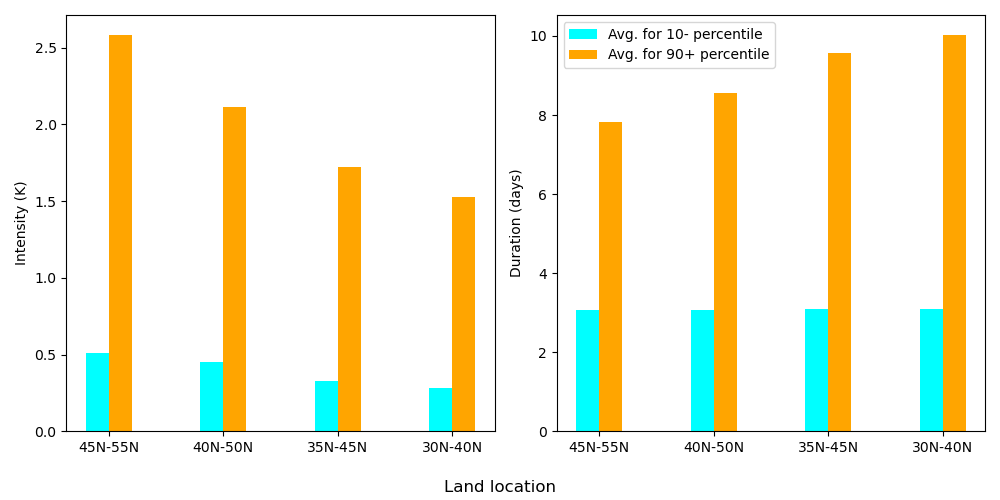

0.5072734291275834 0.2824116618843382


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_size_inches(10, 5)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index1= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index2= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index3= pickle.load(f)
with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index4= pickle.load(f)
    

int_list1=[]
dur_list1=[]
int_list2=[]
dur_list2=[]
int_list3=[]
dur_list3=[]
int_list4=[]
dur_list4=[]

for i in range(len(heat_index1)):
    
    int_list1.append(heat_index1[i][3])
    dur_list1.append(heat_index1[i][4])


for i in range(len(heat_index2)):
    
    int_list2.append(heat_index2[i][3])
    dur_list2.append(heat_index2[i][4])

for i in range(len(heat_index3)):

    int_list3.append(heat_index3[i][3])
    dur_list3.append(heat_index3[i][4])
    
for i in range(len(heat_index4)):

    int_list4.append(heat_index4[i][3])
    dur_list4.append(heat_index4[i][4])


dur1l=[];dur1h=[]
int1l=[];int1h=[]

dur2l=[];dur2h=[]
int2l=[];int2h=[]

dur3l=[];dur3h=[]
int3l=[];int3h=[]

dur4l=[];dur4h=[]
int4l=[];int4h=[]

cut=np.quantile(dur_list1,[0,0.1,0.45,0.55,0.9,1])

for i in range(len(dur_list1)):
    if (dur_list1[i]>=cut[0]  and dur_list1[i]<=cut[1]):
        dur1l.append(dur_list1[i])
    if (dur_list1[i]>=cut[4]  and dur_list1[i]<=cut[5]):
        dur1h.append(dur_list1[i])

cut=np.quantile(int_list1,[0,0.1,0.45,0.55,0.9,1])

for i in range(len(dur_list1)):
    if (int_list1[i]>=cut[0]  and int_list1[i]<=cut[1]):
        int1l.append(int_list1[i])
    if (int_list1[i]>=cut[4]  and int_list1[i]<=cut[5]):
        int1h.append(int_list1[i])
    
##########################################################################
cut=np.quantile(dur_list2,[0,0.1,0.45,0.55,0.9,1])

for i in range(len(dur_list2)):
    if (dur_list2[i]>=cut[0]  and dur_list2[i]<=cut[1]):
        dur2l.append(dur_list2[i])
    if (dur_list2[i]>=cut[4]  and dur_list2[i]<=cut[5]):
        dur2h.append(dur_list2[i])

cut=np.quantile(int_list2,[0,0.1,0.45,0.55,0.9,1])

for i in range(len(dur_list2)):
    if (int_list2[i]>=cut[0]  and int_list2[i]<=cut[1]):
        int2l.append(int_list2[i])
    if (int_list2[i]>=cut[4]  and int_list2[i]<=cut[5]):
        int2h.append(int_list2[i])
        

##########################################################################
cut=np.quantile(dur_list3,[0,0.1,0.45,0.55,0.9,1])

for i in range(len(dur_list3)):
    if (dur_list3[i]>=cut[0]  and dur_list3[i]<=cut[1]):
        dur3l.append(dur_list3[i])
    if (dur_list3[i]>=cut[4]  and dur_list3[i]<=cut[5]):
        dur3h.append(dur_list3[i])

cut=np.quantile(int_list3,[0,0.1,0.45,0.55,0.9,1])

for i in range(len(dur_list3)):
    if (int_list3[i]>=cut[0]  and int_list3[i]<=cut[1]):
        int3l.append(int_list3[i])
    if (int_list3[i]>=cut[4]  and int_list3[i]<=cut[5]):
        int3h.append(int_list3[i])
        
##########################################################################
cut=np.quantile(dur_list4,[0,0.1,0.45,0.55,0.9,1])

for i in range(len(dur_list4)):
    if (dur_list4[i]>=cut[0]  and dur_list4[i]<=cut[1]):
        dur4l.append(dur_list4[i])
    if (dur_list4[i]>=cut[4]  and dur_list4[i]<=cut[5]):
        dur4h.append(dur_list4[i])

cut=np.quantile(int_list4,[0,0.1,0.45,0.55,0.9,1])

for i in range(len(dur_list4)):
    if (int_list4[i]>=cut[0]  and int_list4[i]<=cut[1]):
        int4l.append(int_list4[i])
    if (int_list4[i]>=cut[4]  and int_list4[i]<=cut[5]):
        int4h.append(int_list4[i])


x = np.arange(4) 
y1 = [np.mean(int1l), np.mean(int2l), np.mean(int3l), np.mean(int4l)] 
y2 = [np.mean(int1h), np.mean(int2h), np.mean(int3h), np.mean(int4h)] 
width = 0.2
  
# plot data in grouped manner of bar type 
ax[0].bar(x-0.1, y1, width, color='cyan') 
ax[0].bar(x+0.1, y2, width, color='orange') 
plt.xticks(x, ['45N-55N', '40N-50N', '35N-45N', '30N-40N']) 
ax[0].set_ylabel("Intensity (K)") 
# ax[0].legend(["10 percentile", "90 percentile"]) 


x = np.arange(4) 
y1 = [np.mean(dur1l), np.mean(dur2l), np.mean(dur3l), np.mean(dur4l)] 
y2 = [np.mean(dur1h), np.mean(dur2h), np.mean(dur3h), np.mean(dur4h)] 

print(np.mean(int1l),np.mean(int4l))
width = 0.2
  
# plot data in grouped manner of bar type 
ax[1].bar(x-0.1, y1, width, color='cyan') 
ax[1].bar(x+0.1, y2, width, color='orange') 
# plt.xticks(x, ['45-55', '40-50', '35-45', '30-40']) 
# ax[1].set_xlabel("Land location") 
ax[1].set_ylabel("Duration (days)") 
ax[1].legend(["Avg. for 10- percentile", "Avg. for 90+ percentile"]) 

fig.supxlabel("Land location")

plt.tight_layout() 

plt.savefig('/home/data/lab_abel/Paper1_plots/barplot_mean.pdf', bbox_inches='tight')